In [3]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
table_tennis <- read.csv("player_stats.csv")
table_tennis

X,Age,Country,Plays,Wikipedia,Current.Rank,Best.Rank,Name,Backhand,Prize.Money,⋯,Facebook,Twitter,Nicknames,Grand.Slams,Davis.Cups,Web.Site,Team.Cups,Olympics,Weeks.at.No..1,Tour.Finals
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,,,⋯,,,,NA,NA,,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,,,,NA,NA,,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,,,,NA,NA,,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,,,⋯,,,,NA,NA,,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,,,⋯,,,,NA,NA,,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,,,,NA,NA,,NA,NA,NA,NA



The dataset has the player statistics, including their total winnings, current & best rank, and age. There are 37 variables and, 500 observations seen in the dataset.

In [5]:
table_tennis_categorical <- filter(table_tennis, Active == "Yes") %>%
                            select(Age, Current.Rank, Best.Rank, Name)
table_tennis_categorical

Age,Current.Rank,Best.Rank,Name
<chr>,<chr>,<chr>,<chr>
32 (03-11-1987),178 (280),44 (14-01-2013),Lukas Lacko
21 (29-05-1998),236 (199),130 (10-04-2017),Duck Hee Lee
27 (21-10-1992),183 (273),17 (11-01-2016),Bernard Tomic
⋮,⋮,⋮,⋮
26 (28-07-1993),324 (120),249 (24-12-2018),Dimitar Kuzmanov
20 (31-01-1999),397 (89),394 (18-11-2019),Artem Dubrivnyy
26 (03-09-1993),5 (5890),4 (06-11-2017),Dominic Thiem


In [6]:
library(stringr)

table_tennis <- str_replace_all(string = table_tennis, pattern = "US$", replacement = "")
ts <- select(table_tennis,Prize.Money)

ts


Warning message in stri_replace_all_regex(string, pattern, fix_replacement(replacement), :
“argument is not an atomic vector; coercing”
Warning message:
“`select_()` is deprecated as of dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


ERROR: Error in UseMethod("select_"): no applicable method for 'select_' applied to an object of class "character"


The main outcome/categorical/label variable would be, "Current and Best Rank of Active Tennis players with Age".

In [8]:
table_tennis <- separate(table_tennis,
  col = Prize.Money,
  into = c("waste", "Money"),
  sep = "$")

table_tennis

ERROR: Error in UseMethod("separate_"): no applicable method for 'separate_' applied to an object of class "character"


There would be four different values/groups in this variable including the Age, Name, Current.Rank, and Best.Rank.

There are 496 observations per group.

In [5]:
plays <- table_tennis %>%
group_by(Plays) %>%
summarize(n=n())
plays

`summarise()` ungrouping output (override with `.groups` argument)



Plays,n
<chr>,<int>
,47
Left-handed,62
Right-handed,391


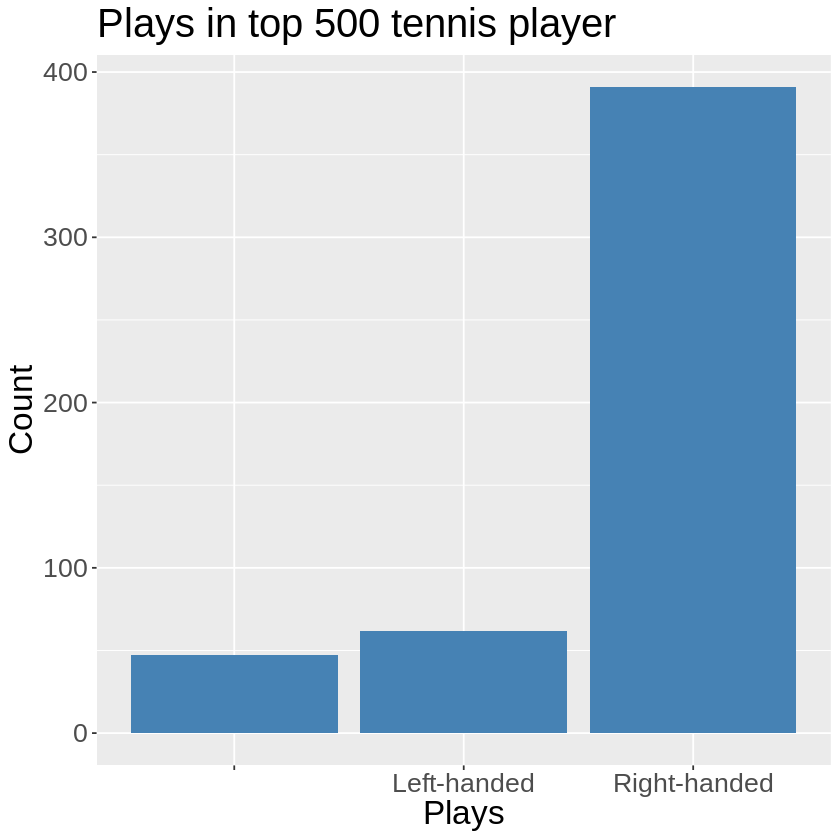

In [6]:
Play_P <-  plays %>%
ggplot(aes(x= Plays,y=n)) +
geom_bar(stat="identity", fill="steelblue")+
xlab("Plays")+
ylab("Count")+
ggtitle("Plays in top 500 tennis player")+
theme(text = element_text(size=20))
Play_P

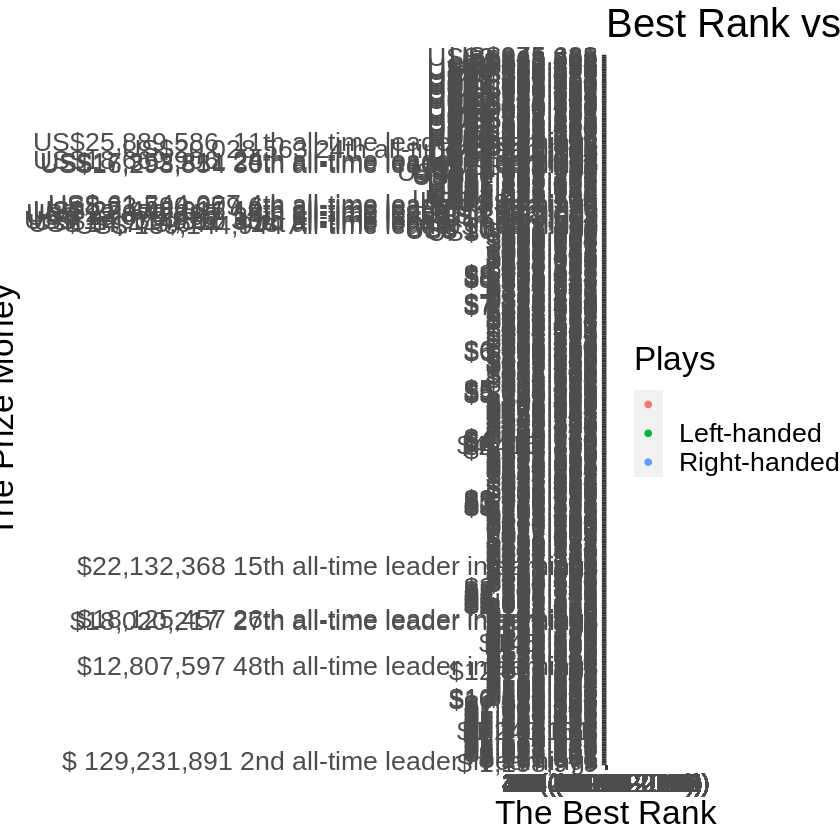

In [10]:
BestRan_Price <- table_tennis %>%
    ggplot(aes(x=Best.Rank, y=Prize.Money))+
    geom_point(aes(colour = Plays)) +
    xlab("The Best Rank")+
    ylab("The Prize Money")+
    labs(colour = "Plays", title="Best Rank vs Prize Money")+
    theme(text = element_text(size = 20))

BestRan_Price